## # Linear Regression Project

We just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired us on contract to help them figure it out!

## Imports
**Importing pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* **Avg. Session Length:** Average session of in-store style advice sessions.
* **Time on App:** Average time spent on App in minutes
* **Time on Website:** Average time spent on Website in minutes
* **Length of Membership:** How many years the customer has been a member. 

**Reading in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv(r"C:\Users\hkdtu\Projects\Linear Regression (Intern Resume)\Ecommerce Customers.csv")

**Checking the head of customers, and its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,498.000000,498.000000,498.000000,495.000000,495.000000
mean,33.054953,12.045917,37.063336,3.526269,499.762817
std,0.994011,0.990587,1.009300,1.001067,79.223139
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.344967,11.387235,36.353186,2.926668,445.406013
50%,33.086914,11.980553,37.069367,3.531402,499.140152
75%,33.714649,12.731589,37.717324,4.120463,549.882368
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                499 non-null    object 
 3   Avg. Session Length   498 non-null    float64
 4   Time on App           498 non-null    float64
 5   Time on Website       498 non-null    float64
 6   Length of Membership  495 non-null    float64
 7   Yearly Amount Spent   495 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

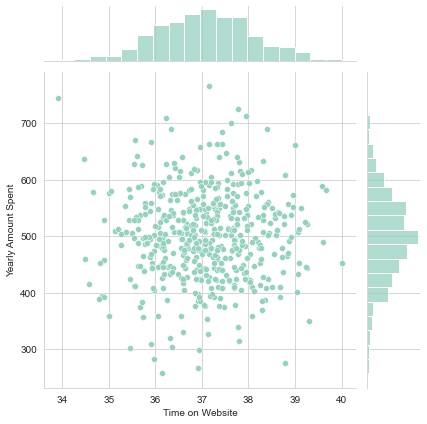

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

As far as trying to interpret the sort of scatterplot there doesn't appear to be a clear trend between time on a Web site and yearly amounts spent just by looking at this visually.

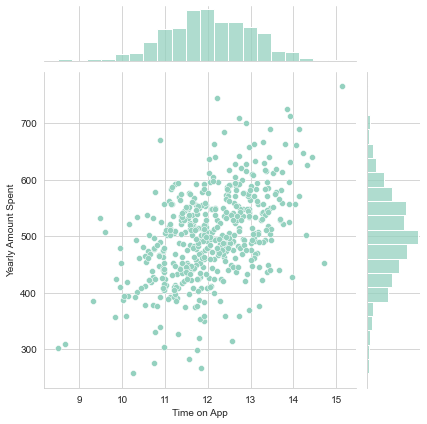

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

It looks like there begins to be some sort of correlation between increased time on app increasing yearly amount spent expenditure.

**Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

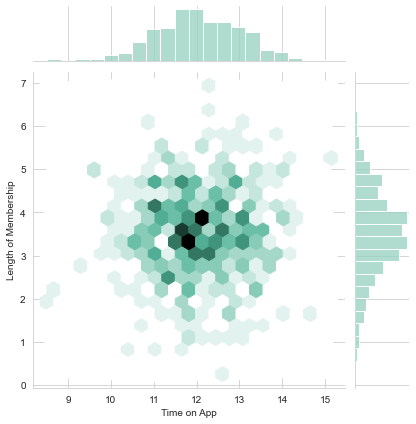

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Using pairplot to recreate the plot below.**

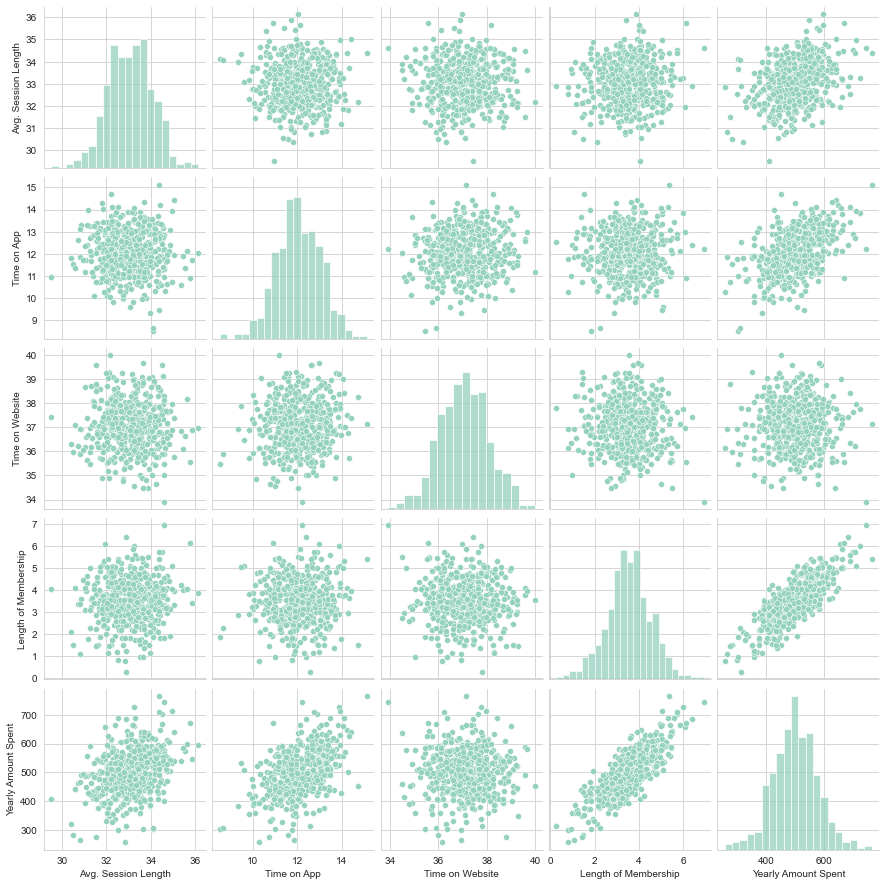

In [10]:
sns.pairplot(customers)

**Based off this plot Length of Membership to be the most correlated feature with Yearly Amount Spent**

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

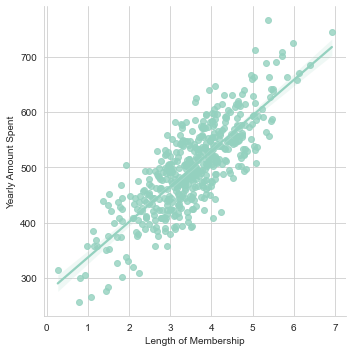

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

# Null Value Treatment

In [13]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  1
Avg. Session Length     2
Time on App             2
Time on Website         2
Length of Membership    5
Yearly Amount Spent     5
dtype: int64

**We have few null values lets drop them**

In [14]:
customers.dropna(inplace = True)

In [15]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Outliers Treatment

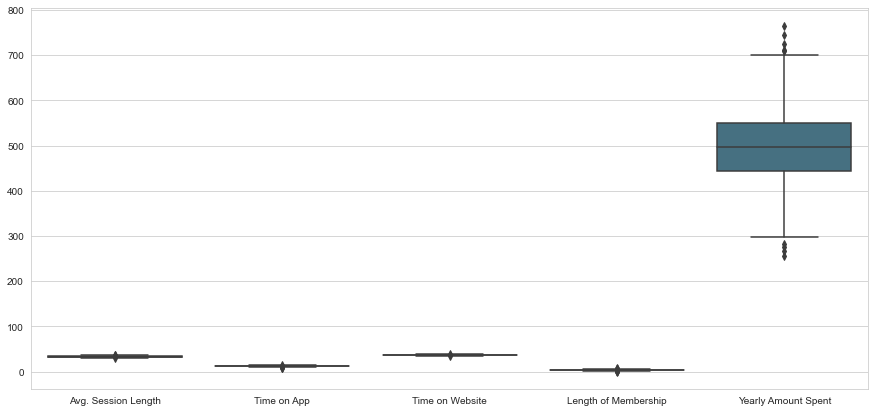

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

In [17]:
from scipy.stats.mstats import winsorize
winsorize(customers['Yearly Amount Spent'],(0.05,0.05),inplace=True)
plt.show()


lets check now

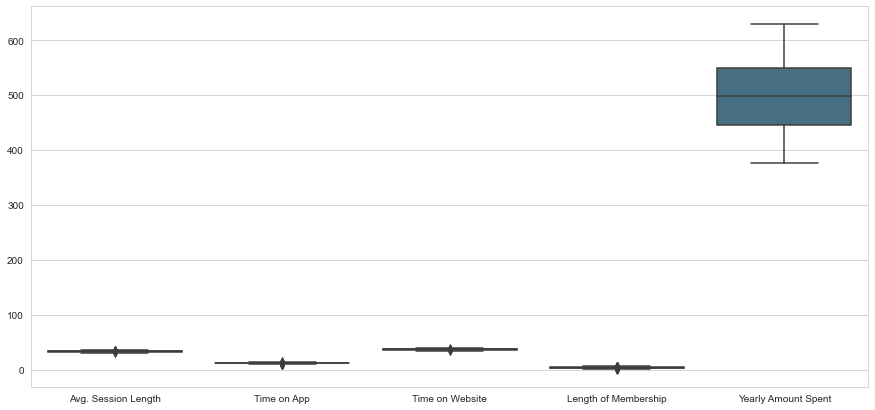

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(data = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

**There are no outliers as we can see.**

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [19]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
y = customers['Yearly Amount Spent']

In [21]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**Importing LinearRegression from sklearn.linear_model**

In [24]:
import statsmodels.api as sm

**Creating an instance of a LinearRegression() model named lm.**

In [25]:
X_train1 = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train1).fit()
X_test1 = sm.add_constant(X_test)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.945
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     1445.
Date:                 Thu, 25 Aug 2022   Prob (F-statistic):          8.84e-210
Time:                         10:21:55   Log-Likelihood:                -1426.0
No. Observations:                  340   AIC:                             2862.
Df Residuals:                      335   BIC:                             2881.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

**p value of "time on website" is greater than 0.5 so lets remove it**

In [26]:
y2 = customers['Yearly Amount Spent']
X2 = customers[['Avg. Session Length', 'Time on App','Length of Membership']]

In [27]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [28]:
X2_train2 = sm.add_constant(X2_train)

model2 = sm.OLS(y2_train, X2_train2).fit()
X2_test2 = sm.add_constant(X2_test)
predictions2 = model2.predict(X2_test2) 

print_model2 = model2.summary()
print(print_model2)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.945
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     1931.
Date:                 Thu, 25 Aug 2022   Prob (F-statistic):          1.96e-211
Time:                         10:21:55   Log-Likelihood:                -1426.1
No. Observations:                  340   AIC:                             2860.
Df Residuals:                      336   BIC:                             2875.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

**Creating a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predictions')

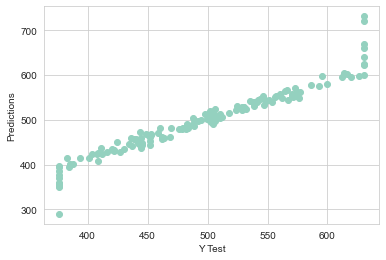

In [29]:
plt.scatter(y2_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculated the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [30]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 12.102095457100027
MSE: 349.4036010893148
RMSE: 18.692340706538463


## Residuals

We have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and make sure it looks normally distributed. Using either seaborn distplot, or just plt.hist().**

H:\PythonDir\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


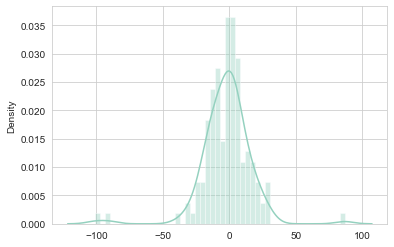

In [31]:
sns.distplot((y2_test-predictions2),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 23.2494 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 33.5007 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 52.872 total dollars spent**.

**Lets see if the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. We would want to develop the app and website both but more focus to be given to the app as time on App and length of membership is associated with more increment in total dollars spent.
